# Time Series + Fuzzy logic

In [7]:
import pandas 
import statsmodels 
import matplotlib

In [14]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

# Ensure the data has a datetime index and a single time series column
data['Date'] = pd.to_datetime(data['Date'])  # Assuming a 'Date' column
data.set_index('Date', inplace=True)

# Preview the data
print(data.head())

            Open  High  Low  Close  Volume Currency
Date                                               
2010-07-18   0.0   0.1  0.1    0.1      75      USD
2010-07-19   0.1   0.1  0.1    0.1     574      USD
2010-07-20   0.1   0.1  0.1    0.1     262      USD
2010-07-21   0.1   0.1  0.1    0.1     575      USD
2010-07-22   0.1   0.1  0.1    0.1    2160      USD


### Visualization

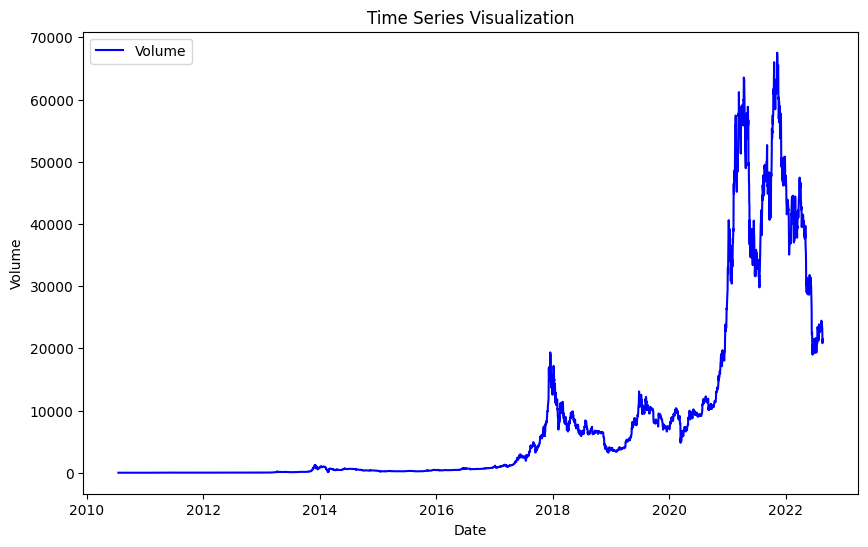

In [15]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'], label='Volume', color='blue')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Open'])  # Replace 'Value' with your time series column name
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is not stationary.")
else:
    print("Time series is stationary.")

ADF Statistic: -1.7445370129486115
p-value: 0.4083239556572925
Time series is not stationary.


In [22]:
print(data[:0])

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Currency]
Index: []


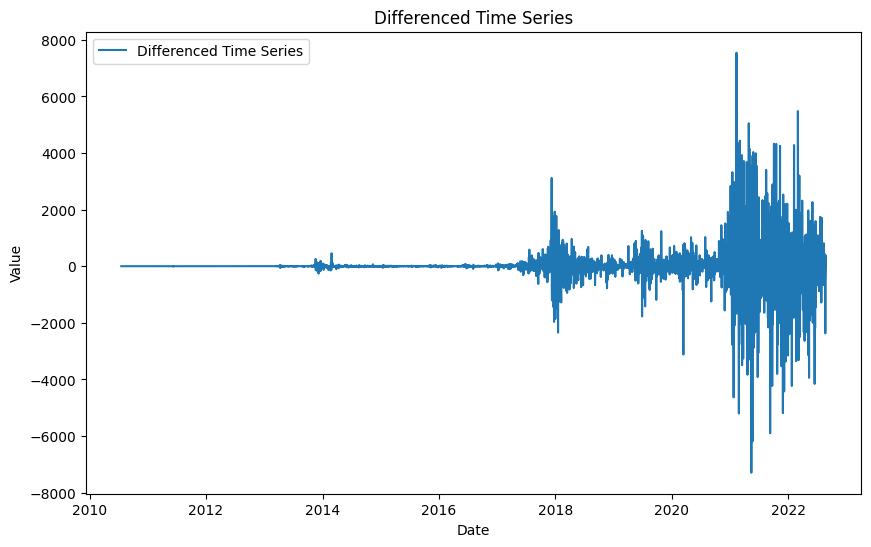

In [31]:
data['Open'] = data['Open'].astype(int)
data['High'] = data['High'].astype(int)
data['Low'] = data['Low'].astype(int)
data['Close'] = data['Close'].astype(int)
data['Volume'] = data['Volume'].astype(int)
# data = data.drop('Currency', axis=1)

# data = data[0:]

data_diff = data.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff['Open'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

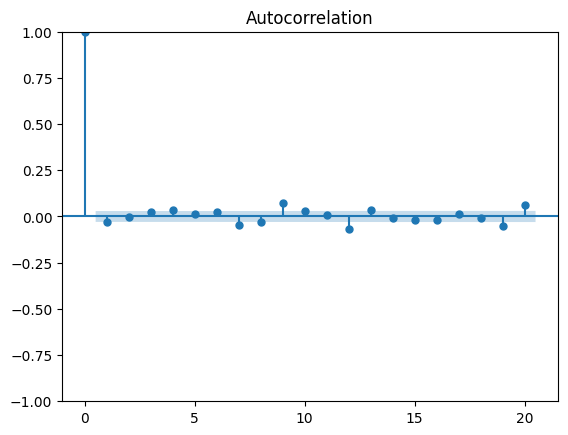

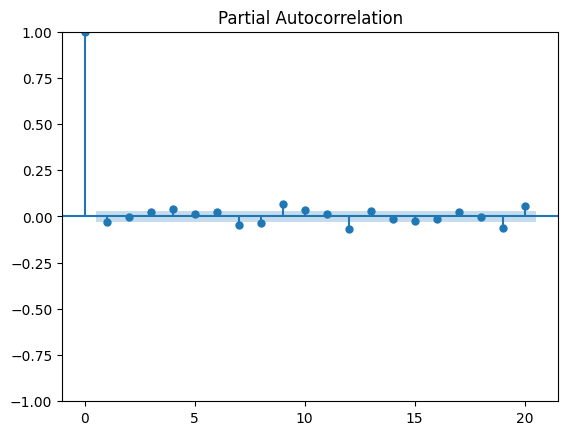

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(data_diff['Open'], lags=20)
plt.show()

# PACF plot
plot_pacf(data_diff['Open'], lags=20)
plt.show()

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data['Open'], order=(2, 1, 2))  # Replace (p, d, q) with identified values
result = model.fit()

# Model summary
print(result.summary())

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 4420
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -34900.417
Date:                Mon, 13 Jan 2025   AIC                          69810.834
Time:                        21:10:17   BIC                          69842.802
Sample:                    07-18-2010   HQIC                         69822.108
                         - 08-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8155      0.009     95.223      0.000       0.799       0.832
ar.L2         -0.9282      0.007   -126.884      0.000      -0.943      -0.914
ma.L1         -0.8537      0.008   -104.403      0.0

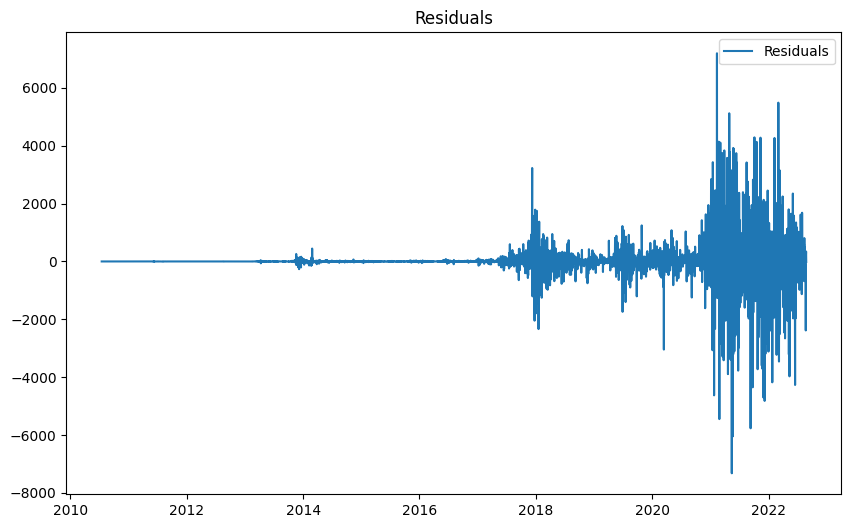

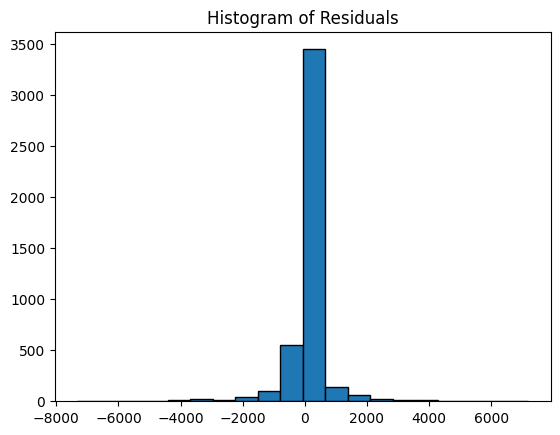

In [51]:
# Plot residuals
residuals = result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()

# Plot histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

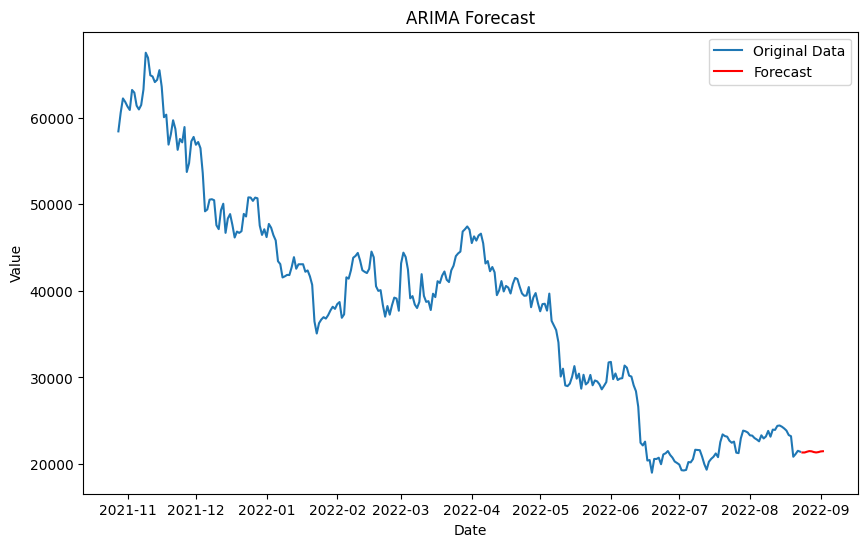

In [55]:
# Forecast the next 10 steps
forecast = result.forecast(steps=10)


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Next time:
- take interval 3 months, make predictions from 2 months for the third month
- fuzzy logic how to apply
- read more on ARIMA and other models